<a href="https://colab.research.google.com/github/SatvikGit/MoneyXAI/blob/main/MoneyXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

# Data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Math-related functions
import math
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox

# Suppressing warnings for a cleaner output
import warnings
warnings.filterwarnings("ignore")

# Pipeline and transformations for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

# Pipeline and transformations for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Metrics for evaluating the model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d berkanoztas/synthetic-transaction-monitoring-dataset-aml --unzip

Dataset URL: https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml
License(s): CC-BY-NC-SA-4.0
 92% 178M/193M [00:01<00:00, 115MB/s]
100% 193M/193M [00:01<00:00, 127MB/s]


In [ ]:
import os
os.listdir()

['.config', 'kaggle (1).json', 'SAML-D.csv', 'sample_data']

## **Data Preprocessing**

In [ ]:
# Dataset comprises of 9504852 rows and 12 columns
raw_df = pd.read_csv("SAML-D.csv")

raw_df.shape

(9504852, 12)

In [ ]:
# We train the model on 1800000 rows and all 12 columns
df = raw_df.sample(n=1800000, random_state=1)

df.shape

(1800000, 12)

In [ ]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
9232719,02:08:46,2023-08-14,4248061080,9527052910,13480.74,Mexican Peso,UK pounds,UK,UK,Debit card,0,Normal_Plus_Mutual
7996180,19:48:23,2023-07-02,9130896737,908371799,10480.05,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
8575435,12:04:24,2023-07-22,1466348255,8545558838,26232.35,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
614744,17:08:02,2022-10-28,2181923623,6234034932,447.07,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
4092093,22:44:17,2023-02-21,8596132461,3638213339,1005.62,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out


<Axes: xlabel='Is_laundering', ylabel='count'>

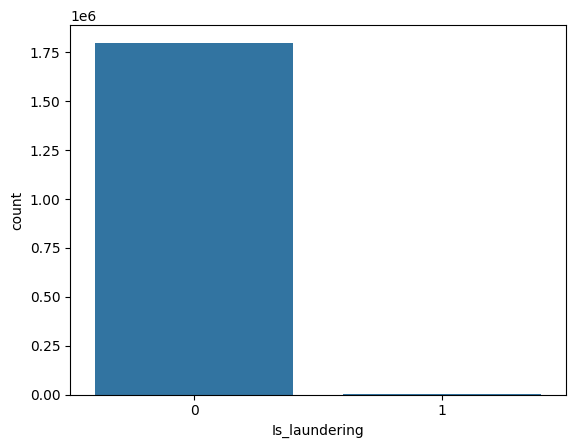

In [ ]:
sns.countplot(data=df, x='Is_laundering')

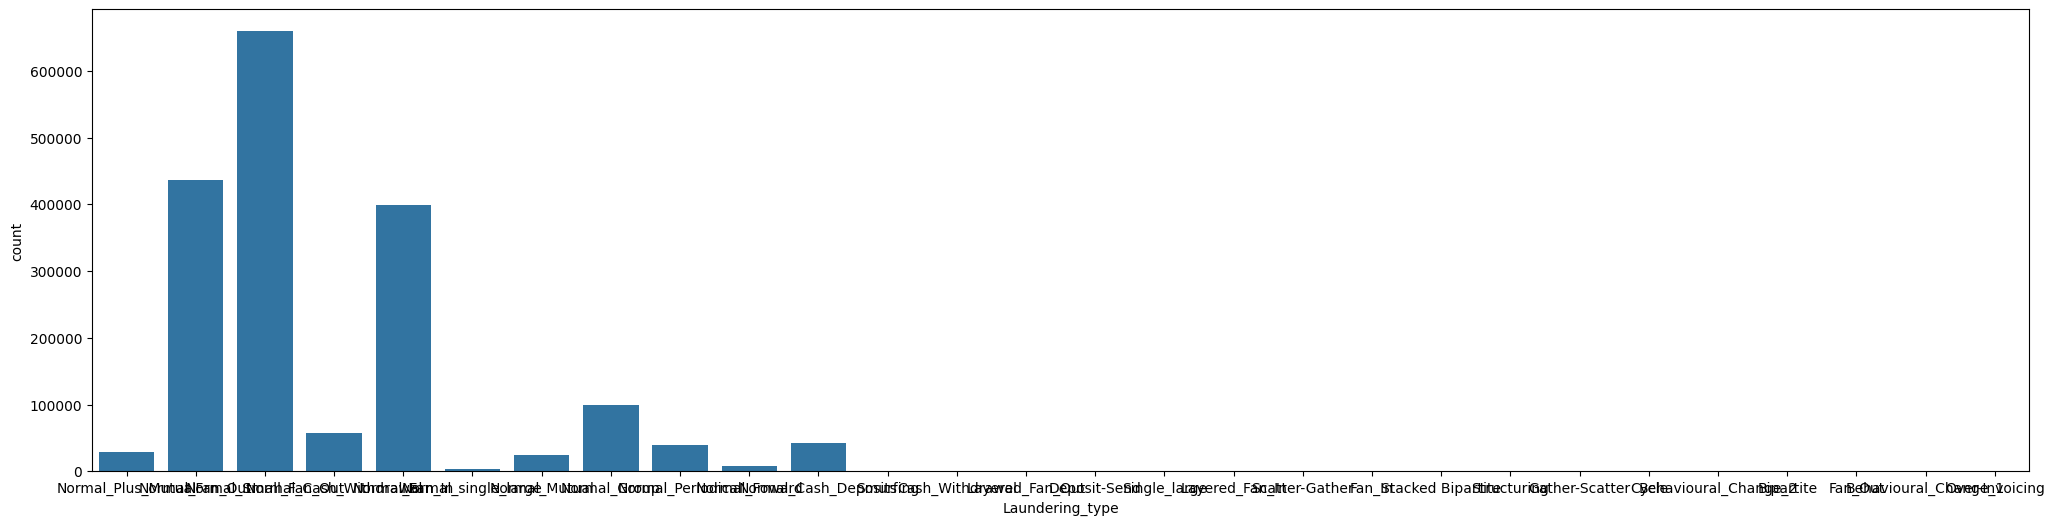

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='Laundering_type')
plt.show();

In [ ]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

In [ ]:
df.info()

In [ ]:
## Converting date into datetime format

df['Date'] = pd.to_datetime(df['Date'])

# Extract month, day, and week

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Week'] = df['Date'].dt.isocalendar().week

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800000 entries, 9232719 to 7980298
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Time                    object        
 1   Date                    datetime64[ns]
 2   Sender_account          int64         
 3   Receiver_account        int64         
 4   Amount                  float64       
 5   Payment_currency        object        
 6   Received_currency       object        
 7   Sender_bank_location    object        
 8   Receiver_bank_location  object        
 9   Payment_type            object        
 10  Is_laundering           int64         
 11  Laundering_type         object        
 12  Year                    int32         
 13  Month                   int32         
 14  Day                     int32         
 15  Week                    UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(3), int64(3), object(7)
memory usage: 

In [ ]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

<Axes: xlabel='Year', ylabel='count'>

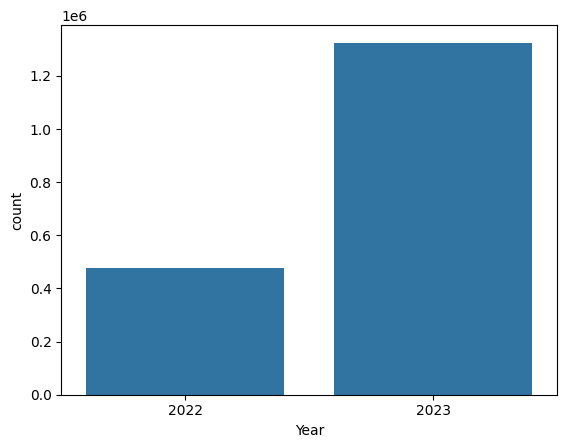

In [ ]:
sns.countplot(data=df, x='Year')

In [ ]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

In [ ]:
# Count the total number of transactions and number of laundering transactions for each payment type
transactions_per_payment_type = df['Payment_type'].value_counts()

laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size()

# Analysis:
# - Cross-border transactions have the highest number of laundering cases (492).
# - Cash-based transactions (withdrawals and deposits) are frequently used for laundering.
# - ACH transactions also show a significant number of laundering cases.
transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 Debit card         381387
 Credit card        381115
 Cheque             380851
 ACH                380386
 Cross-border       177187
 Cash Withdrawal     56482
 Cash Deposit        42592
 Name: count, dtype: int64,
 Payment_type
 ACH                237
 Cash Deposit       272
 Cash Withdrawal    256
 Cheque             191
 Credit card        224
 Cross-border       492
 Debit card         216
 dtype: int64)

In [ ]:
# Aggregate statistics for normal and for laundering transactions
laundering_stats = df[df['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = df[df['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

# Analysis:
# - Laundering transactions involve much higher amounts than normal transactions.
# - The highest laundering transaction (12.6M) is over 12 times the highest normal transaction (999K).
# - The average laundering transaction (36.6K) is much larger than the normal transaction average (8.7K).
# - Even the minimum laundering transaction amount (20) is higher than the smallest normal transaction (4.57).
print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     1.261850e+07
mean    3.659090e+04
min     2.000000e+01
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     999220.380000
mean      8752.198567
min          4.570000
Name: Amount, dtype: float64


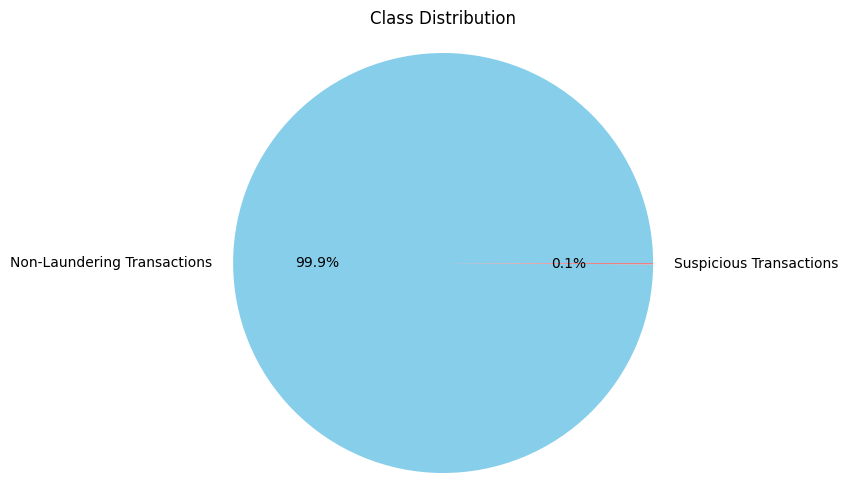

In [ ]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

# The pie chart shows that 99.9% of transactions are normal, while only 0.1% are flagged as suspicious.
plt.show();

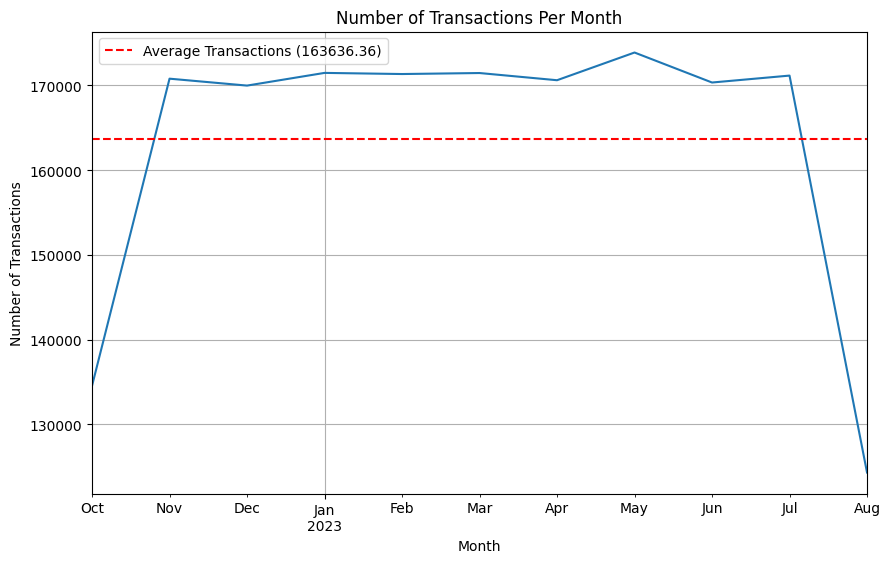

In [ ]:
## Monthly Transactions

monthly_transactions = df.groupby(df['Date'].dt.to_period('M')).size()

average_monthly_transactions = monthly_transactions.mean()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show();

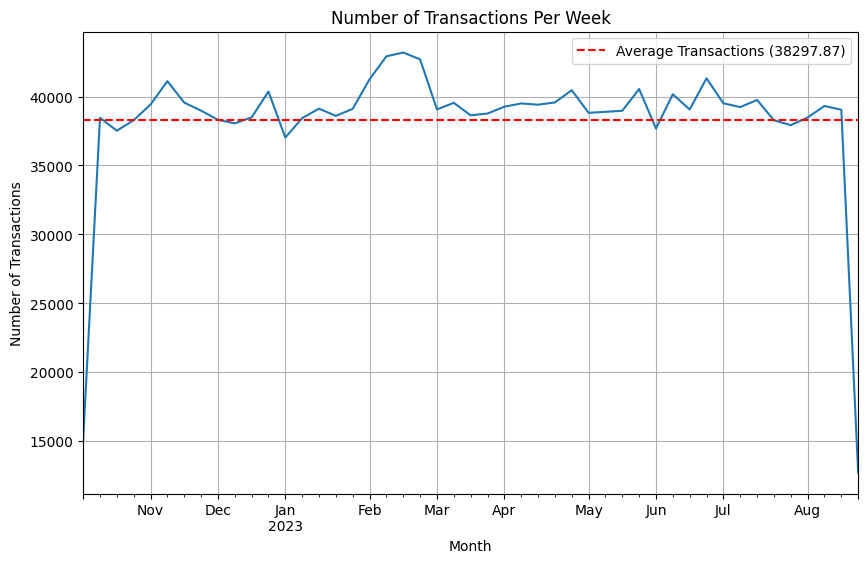

In [ ]:
## Weekly Transactions

weekly_transactions = df.groupby(df['Date'].dt.to_period('W')).size()

average_weekly_transactions = weekly_transactions.mean()

plt.figure(figsize=(10, 6))
weekly_transactions.plot(kind='line')
plt.axhline(y=average_weekly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_weekly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Week')
plt.legend()
plt.grid(True)
plt.show();

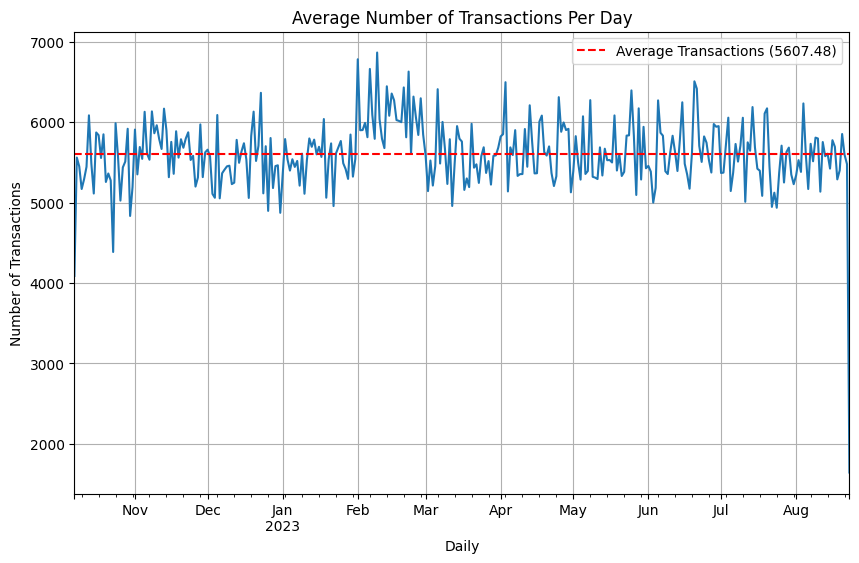

In [ ]:
## Daily Transactions

daily_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

average_daily_transactions = daily_transactions.mean()


plt.figure(figsize=(10, 6))
daily_transactions.plot(kind='line')
plt.axhline(y=average_daily_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_daily_transactions:.2f})')
plt.xlabel('Daily')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Day')
plt.legend()
plt.grid(True)
plt.show();

In [ ]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

In [ ]:
df['Is_laundering'].value_counts()

,count
Is_laundering,
0,1798112
1,1888


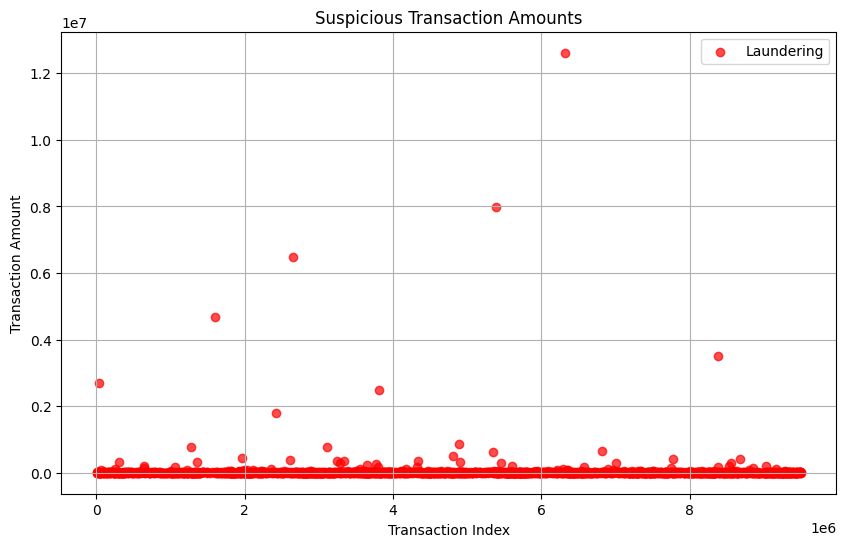

In [ ]:
# Separate the data

laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['Amount'], color='red', label='Laundering', alpha=0.7)

plt.title('Suspicious Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show();

Text(0.5, 0, 'Number of Alerts')

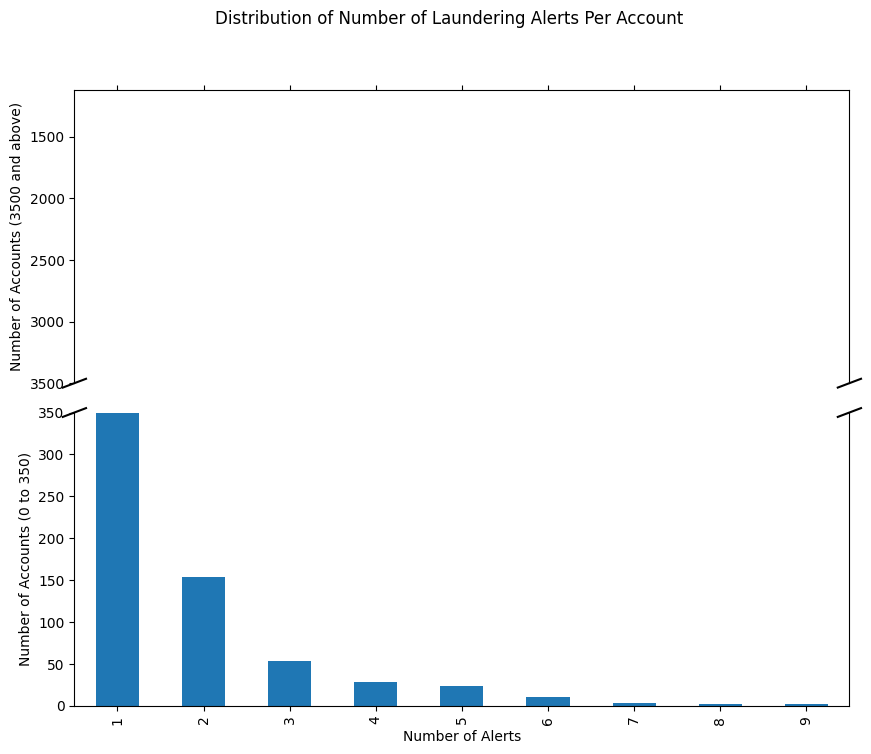

In [ ]:
# Filter laundering transactions and count alerts per account
laundering_df = df[df['Is_laundering'] == 1]

account_alert_counts = laundering_df.groupby('Sender_account').size()
alert_distribution = account_alert_counts.value_counts()
alert_distribution = alert_distribution.sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.1)

alert_distribution.plot(kind='bar', ax=ax1)
alert_distribution.plot(kind='bar', ax=ax2)

fig.suptitle('Distribution of Number of Laundering Alerts Per Account')

ax1.set_ylim(3500, alert_distribution.max()+50)
ax2.set_ylim(0, 350)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # diagonal lines size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax2.set_ylabel('Number of Accounts (0 to 350)')
ax1.set_ylabel('Number of Accounts (3500 and above)')
ax2.set_xlabel('Number of Alerts')

In [ ]:
df[['Sender_account', 'Receiver_account']].describe()

,Sender_account,Receiver_account
count,1.800000e+06,1.800000e+06
mean,5.009269e+09,5.007003e+09
std,2.885757e+09,2.885067e+09
min,2.851100e+04,9.018000e+03
25%,2.517733e+09,2.513645e+09
50%,5.004564e+09,5.003686e+09
75%,7.506074e+09,7.502568e+09
max,9.999987e+09,9.999971e+09


In [ ]:
df['Is_laundering'].value_counts()

,count
Is_laundering,
0,1798112
1,1888


Original Skewness: 109.90168404524863
Log-Transformed Skewness: -1.0065672850942349


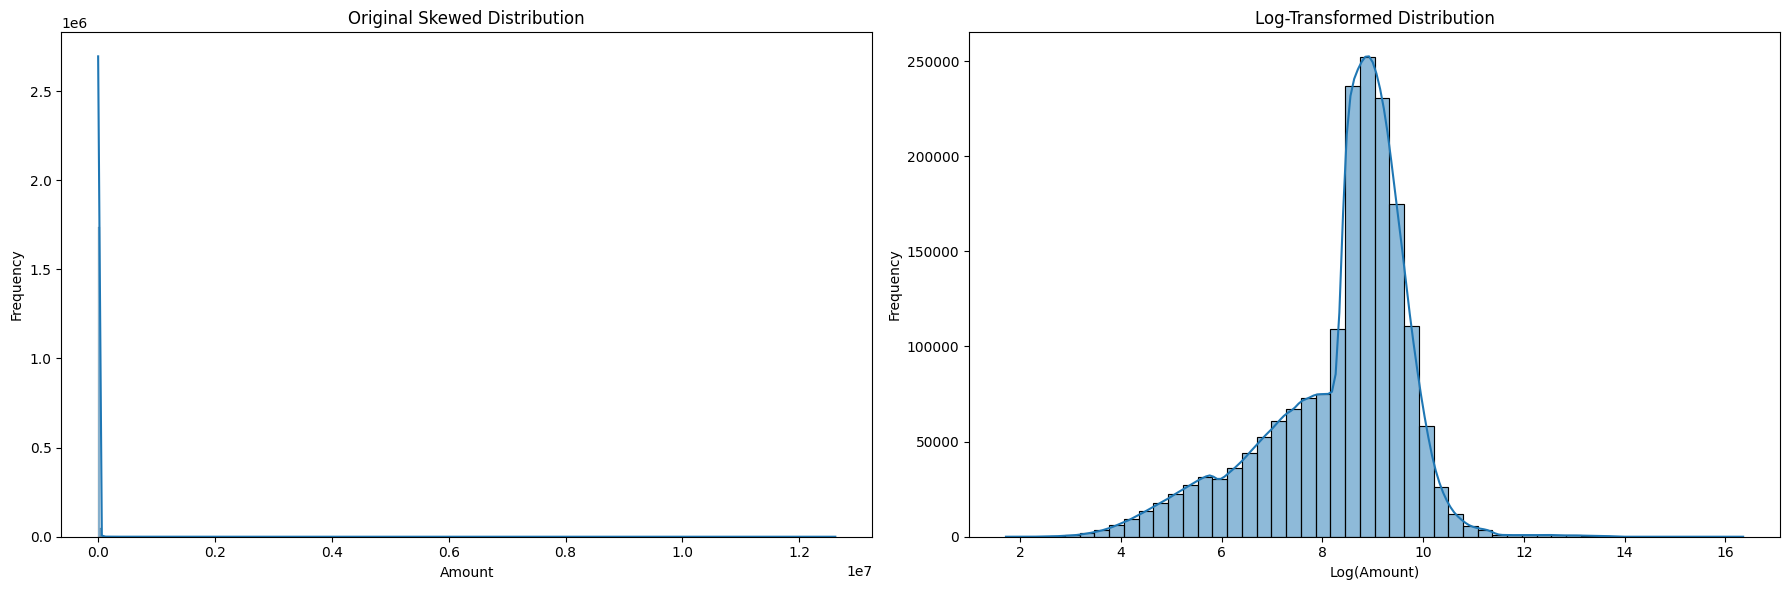

In [ ]:
# Extracting the transaction amounts
skewed_data = df['Amount']

# Calculating original skewness before transformation
original_skewness = skew(skewed_data)
# Extremely high skewness
print(f"Original Skewness: {original_skewness}")

# Applying Log Transformation to reduce skewness
log_transformed_data = np.log1p(skewed_data)
# Checking skewness after transformation
transformed_skewness = skew(log_transformed_data)
print(f"Log-Transformed Skewness: {transformed_skewness}")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot original distribution
sns.histplot(skewed_data, bins=500, kde=True, ax=ax[0])
ax[0].set_title('Original Skewed Distribution')
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Frequency')

# Plot log-transformed distribution
sns.histplot(log_transformed_data, bins=50, kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Distribution')
ax[1].set_xlabel('Log(Amount)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show();

In [ ]:
# Step 1: Calculate the total transaction amount for each Payment Type
# This groups the transactions by 'Payment_type' and sums up the 'Amount' column.
tal_amount_pivot = pd.pivot_table(df, index=["Payment_type"], values='Amount', aggfunc=np.sum)

# Step 2: Count the number of transactions labeled as money laundering
# Filters transactions where 'Is_laundering' is 1, then counts them per Payment Type.
laundering_count_pivot = df[df['Is_laundering'] == 1].groupby('Payment_type').size().to_frame('Laundering_Count')

# Step 3: Count the number of normal (non-laundering) transactions
# Filters transactions where 'Is_laundering' is 0, then counts them per Payment Type.
normal_count_pivot = df[df['Is_laundering'] == 0].groupby('Payment_type').size().to_frame('Normal_Count')

# Step 4: Merge all the tables into one consolidated pivot table
# This combines the total transaction amount, laundering count, and normal count into a single DataFrame.
combined_pivot = total_amount_pivot.join([laundering_count_pivot, normal_count_pivot], how='outer')

# Step 5: Fill any missing values (NaN) with 0
# This ensures that Payment Types with no laundering cases or transactions are properly represented.
combined_pivot = combined_pivot.fillna(0)

cm = sns.light_palette("blue", as_cmap=True)
styled_combined_pivot = combined_pivot.style.background_gradient(cmap=cm)

styled_combined_pivot

,Amount,Laundering_Count,Normal_Count
Payment_type,,,
ACH,3476783971.427023,237,380149
Cash Deposit,92128672.320000,272,42320
Cash Withdrawal,8692019.550000,256,56226
Cheque,3474348671.382348,191,380660
Credit card,3452287218.698709,224,380891
Cross-border,1812084154.421744,492,176695
Debit card,3490192173.279712,216,381171


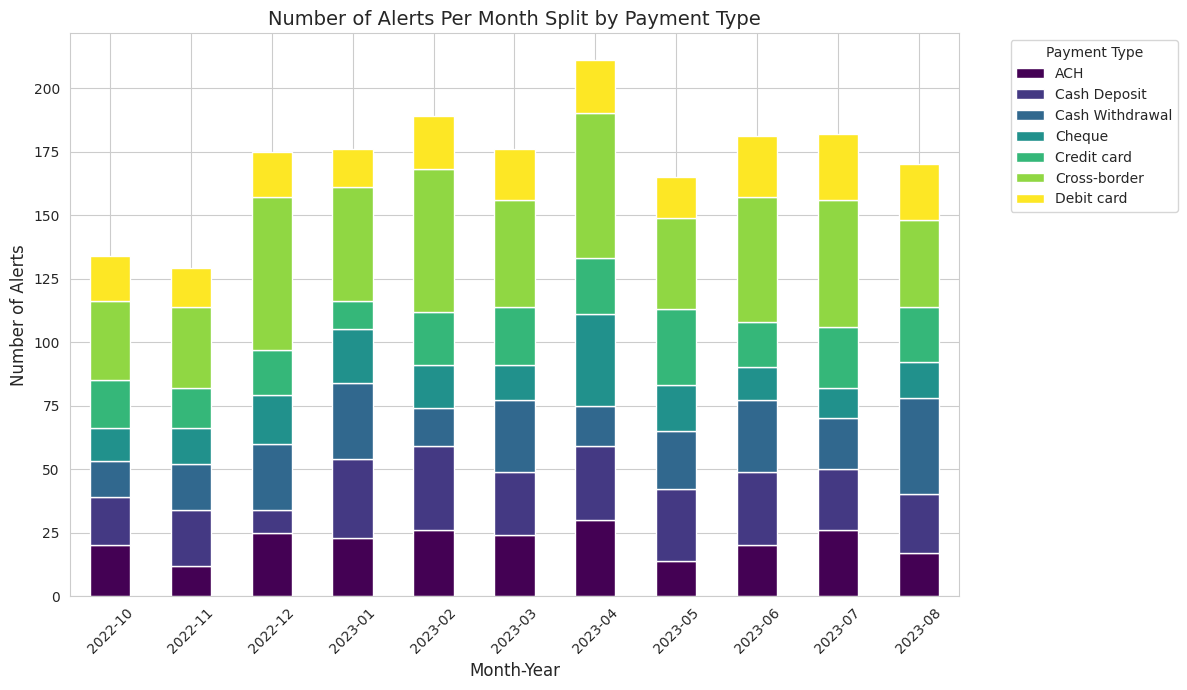

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df.groupby(['Date', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()
grouped_data['Month_Year'] = grouped_data['Date'].dt.to_period('M')
monthly_alerts = grouped_data.groupby(['Month_Year', 'Payment_type']).agg({'Is_laundering': 'sum'}).reset_index()

pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
pivot_data.plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
pivot_data = monthly_alerts.pivot(index='Month_Year', columns='Payment_type', values='Is_laundering')

plt.title('Number of Alerts Per Month Split by Payment Type', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Alerts', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

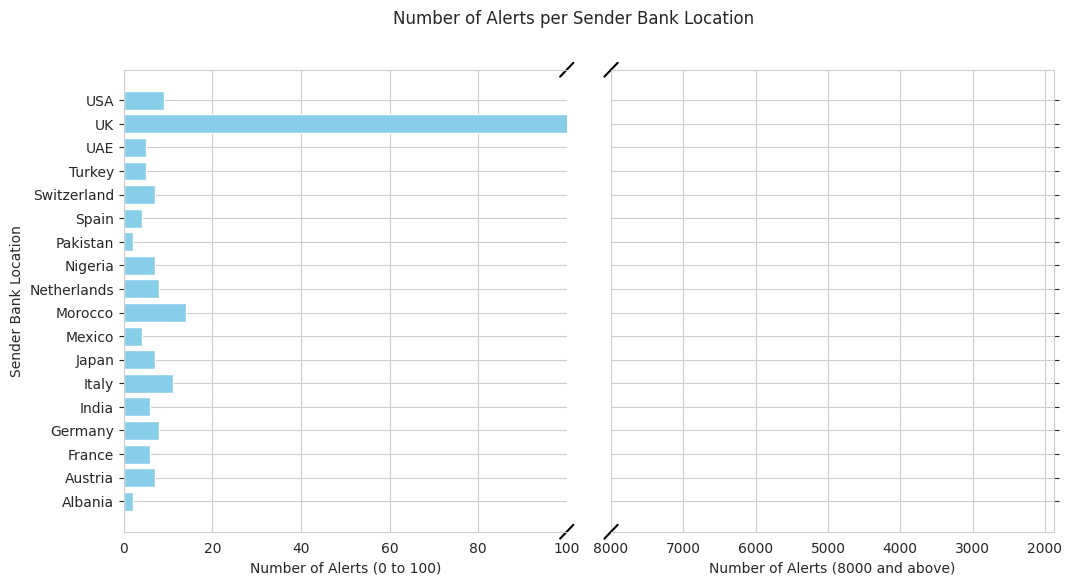

In [ ]:
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.subplots_adjust(wspace=0.1)

ax1.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Sender_bank_location'], alerts_per_location['Is_laundering'], color='skyblue')

ax1.set_xlim(0, 100)  # Set the left subplot values
ax2.set_xlim(8000, max(alerts_per_location['Is_laundering']) + 100)  # Set the right subplot values

fig.suptitle('Number of Alerts per Sender Bank Location')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])

d = .015  # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)

ax1.set_xlabel('Number of Alerts (0 to 100)')
ax2.set_xlabel('Number of Alerts (8000 and above)')
ax1.set_ylabel('Sender Bank Location')

ax1.set_yticks(range(len(alerts_per_location['Sender_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Sender_bank_location'])

## The UK has a significantly **higher volume of alerts**, indicating possible major laundering activities. Other countries (e.g., USA, Netherlands, Morocco) have moderate alert counts. Many countries have very **few alerts**, possibly due to low transaction volume or stricter banking regulations.
plt.show();

In [ ]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Year', 'Month', 'Day', 'Week'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns to reduce redundancy
columns_to_drop = ['Time', 'Date']

df.drop(columns=columns_to_drop, inplace=True)

df.columns

Index(['Sender_account', 'Receiver_account', 'Amount', 'Payment_currency',
       'Received_currency', 'Sender_bank_location', 'Receiver_bank_location',
       'Payment_type', 'Is_laundering', 'Laundering_type', 'Year', 'Month',
       'Day', 'Week'],
      dtype='object')

In [ ]:
# Checking the skewness of the 'Amount' column (to see if the data is imbalanced)
skewed_data = df['Amount']
original_skewness = skew(skewed_data)
# High skewness indicates extreme outliers
print(f"Original Skewness: {original_skewness}")

# Applying log transformation to normalize the skewed 'Amount' column
log_transformed_data = np.log1p(skewed_data)
transformed_skewness = skew(log_transformed_data)
# Should be closer to normal distribution
print(f"Log-Transformed Skewness: {transformed_skewness}")

# Updating the dataframe with transformed values
df['Amount'] = log_transformed_data

Original Skewness: 109.90168404524863
Log-Transformed Skewness: -1.0065672850942349


In [ ]:
# Identifying numerical and categorical columns
num_cols = df.select_dtypes(exclude="object").columns
print(f"We have {len(num_cols)} numerical columns: {num_cols.tolist()}")

categorical_cols = df.select_dtypes(include="object").columns
print(f"We have {len(categorical_cols)} categorical columns: {categorical_cols.tolist()}")

We have 8 numerical columns: ['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering', 'Year', 'Month', 'Day', 'Week']
We have 6 categorical columns: ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']


In [ ]:
# Checking for missing values in the dataset

df.isnull().sum()

,0
Sender_account,0
Receiver_account,0
Amount,0
Payment_currency,0
Received_currency,0
Sender_bank_location,0
Receiver_bank_location,0
Payment_type,0
Is_laundering,0
Laundering_type,0


In [ ]:
# Creating a deep copy of the dataset to ensure the original data remains unchanged

df = df.copy(deep=True)
df.head(2)

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day,Week
9232719,4248061080,9527052910,9.509091,Mexican Peso,UK pounds,UK,UK,Debit card,0,Normal_Plus_Mutual,2023,8,14,33
7996180,9130896737,908371799,9.257324,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out,2023,7,2,26


In [ ]:
df.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day,Week
9232719,4248061080,9527052910,9.509091,Mexican Peso,UK pounds,UK,UK,Debit card,0,Normal_Plus_Mutual,2023,8,14,33
7996180,9130896737,908371799,9.257324,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out,2023,7,2,26
8575435,1466348255,8545558838,10.174787,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out,2023,7,22,29
614744,2181923623,6234034932,6.104949,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,2022,10,28,43
4092093,8596132461,3638213339,6.914353,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,2023,2,21,8


In [ ]:
df.columns

Index(['Sender_account', 'Receiver_account', 'Amount', 'Payment_currency',
       'Received_currency', 'Sender_bank_location', 'Receiver_bank_location',
       'Payment_type', 'Is_laundering', 'Laundering_type', 'Year', 'Month',
       'Day', 'Week'],
      dtype='object')

In [ ]:
numeric_cols = df.select_dtypes(exclude="object").columns

numeric_cols

Index(['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering', 'Year',
       'Month', 'Day', 'Week'],
      dtype='object')

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

categorical_cols

Index(['Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Laundering_type'],
      dtype='object')

In [ ]:
# Counting the number of unique values for each categorical column

unique_counts = df[categorical_cols].nunique()
print("Unique columns in the DataFrame: \n", unique_counts)

Unique columns in the DataFrame: 
 Payment_currency          13
Received_currency         13
Sender_bank_location      18
Receiver_bank_location    18
Payment_type               7
Laundering_type           28
dtype: int64


In [ ]:
# Generating descriptive statistics for numerical columns
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering,Year,Month,Day,Week
count,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1.800000e+06,1800000.0
mean,5.009269e+09,5.007003e+09,8.348515e+00,1.048889e-03,2.022736e+03,6.144242e+00,1.563695e+01,24.874008
std,2.885757e+09,2.885067e+09,1.401467e+00,3.236957e-02,4.408431e-01,3.543524e+00,8.611909e+00,15.432406
min,2.851100e+04,9.018000e+03,1.717395e+00,0.000000e+00,2.022000e+03,1.000000e+00,1.000000e+00,1.0
25%,2.517733e+09,2.513645e+09,7.670460e+00,0.000000e+00,2.022000e+03,3.000000e+00,8.000000e+00,12.0
50%,5.004564e+09,5.003686e+09,8.718368e+00,0.000000e+00,2.023000e+03,6.000000e+00,1.600000e+01,23.0
75%,7.506074e+09,7.502568e+09,9.255411e+00,0.000000e+00,2.023000e+03,1.000000e+01,2.300000e+01,41.0
max,9.999987e+09,9.999971e+09,1.635067e+01,1.000000e+00,2.023000e+03,1.200000e+01,3.100000e+01,52.0


In [ ]:
# Dropping the 'Laundering_type' column because it directly influences the model's predictions,
# leading to an unrealistically high AUC score (data leakage issue).
# Keeping this column would make the model biased and act as if it already "knows" the answer,
# which is undesirable for proper model generalization.
df.drop(columns=['Laundering_type'], axis=1, inplace=True)

In [ ]:
# Re-identifying categorical columns after dropping 'Laundering_type'
categorical_cols = df.select_dtypes(include="object").columns

categorical_cols

Index(['Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type'],
      dtype='object')

In [ ]:
# Separating features (X) and target variable (y)
# 'Is_laundering' is the target variable we want to predict, so we remove it from X
X = df.drop(columns=["Is_laundering"], axis=1)
y = df["Is_laundering"]

In [ ]:
# Identifying numerical features after dropping 'Is_laundering'(excluding categorical ones)
numerical_features = X.select_dtypes(exclude="object").columns

numerical_features

Index(['Sender_account', 'Receiver_account', 'Amount', 'Year', 'Month', 'Day',
       'Week'],
      dtype='object')

In [ ]:
# Identifying categorical columns (features with object data type)
categorical_cols = df.select_dtypes(include="object").columns

categorical_cols

Index(['Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type'],
      dtype='object')

In [ ]:
# Identifying numerical columns (features with numeric data types)
numeric_cols = df.select_dtypes(include=np.number).columns

# Computing correlation of numerical features with the target variable ('Is_laundering')
print(df[numeric_cols].corr()['Is_laundering'].sort_values(ascending=False))

Is_laundering       1.000000
Year                0.002359
Sender_account      0.001806
Receiver_account    0.000454
Amount             -0.001058
Month              -0.001309
Week               -0.001526
Day                -0.002865
Name: Is_laundering, dtype: float64


## **Baseline Model Implementation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

# Define numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

# Define categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(),
        "scaler", StandardScaler())
    ]
)

In [ ]:
# Redefine categorical and numerical columns after dropping 'Laundering_type'
categorical_cols = df.select_dtypes(include="object").columns
print(f"Categorical columns: {categorical_cols.tolist()}")

numerical_features = X.select_dtypes(exclude="object").columns
print(f"Numerical columns: {numerical_features.tolist()}")

# Define ColumnTransformer with both pipelines
transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

Categorical columns: ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type']
Numerical columns: ['Sender_account', 'Receiver_account', 'Amount', 'Year', 'Month', 'Day', 'Week']


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply transformations to the training and testing sets

# Fit and transform training data
X_train = transformer.fit_transform(X_train)
# Transform testing data (without fitting)
X_test = transformer.transform(X_test)

Desired TPR of around 90%:


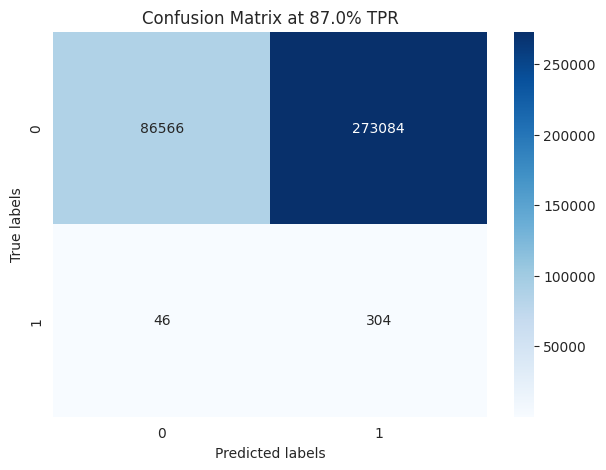

False Positive Rate (FPR): 0.759
True Positive Rate (TPR): 0.869


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Train a Logistic Regression model to obtain probability predictions
model = LogisticRegression()
# Fit the model using the training data
model.fit(X_train, y_train)

# Get the probability scores for the test set
test_probabilities = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve to analyze model performance
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

# Set the desired True Positive Rate (TPR) and find the closest threshold
# Target recall rate
desired_tpr = 0.87
closest_threshold = thresholds[np.argmin(np.abs(tpr - desired_tpr))]
# Get the threshold closest to the target TPR
print(f"Desired TPR of around 90%:")

# Convert probabilities to binary predictions based on the selected threshold
y_pred = (test_probabilities >= closest_threshold).astype(int)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {desired_tpr*100}% TPR')
plt.show()

tn, fp, fn, tp = cm.ravel()
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_cm = fp / (fp + tn)
tpr_cm = tp / (tp + fn)

print(f"False Positive Rate (FPR): {fpr_cm:.3f}")
print(f"True Positive Rate (TPR): {tpr_cm:.3f}")

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns (features with object datatype)
categorical_cols = df.select_dtypes(include="object").columns
print(f"Categorical columns: {categorical_cols.tolist()}")

# Identify numerical columns (features that are not categorical)
numerical_features = X.select_dtypes(exclude="object").columns
print(f"Numerical columns: {numerical_features.tolist()}")

# Define the preprocessing pipeline for categorical and numerical features
transformer = ColumnTransformer(transformers=[
    # Encode categorical features using OrdinalEncoder (unknown values get encoded as -1)
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    # Scale numerical features using RobustScaler (to handle outliers better)
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

# Apply transformations to the training and testing datasets
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Define hyperparameter grid for tuning XGBoost
param_grid = {
    'max_depth': [4,8,16],
    'eta': [0.1,0.2,0.3],
}

# Initialize XGBoost classifier with log loss metric
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Perform grid search with 2-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=2
)

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
print("Best Parameters: ", grid_search.best_params_)

# Select the best trained model from the grid search
best_model = grid_search.best_estimator_


y_pred = best_model.predict_proba(X_test)[:, 1]
# Compute AUC (Area Under ROC Curve) to measure model performance
test_auc = roc_auc_score(y_test, y_pred)
print("Test AUC: ", test_auc)

# Generate classification report (precision, recall, F1-score)
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

Categorical columns: ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type']
Numerical columns: ['Sender_account', 'Receiver_account', 'Amount', 'Year', 'Month', 'Day', 'Week']
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...............................eta=0.1, max_depth=4; total time=   9.8s
[CV] END ...............................eta=0.1, max_depth=4; total time=   4.5s
[CV] END ...............................eta=0.1, max_depth=8; total time=   8.4s
[CV] END ...............................eta=0.1, max_depth=8; total time=   7.4s
[CV] END ..............................eta=0.1, max_depth=16; total time=   9.9s
[CV] END ..............................eta=0.1, max_depth=16; total time=  11.7s
[CV] END ...............................eta=0.2, max_depth=4; total time=   6.5s
[CV] END ...............................eta=0.2, max_depth=4; total time=   4.5s
[CV] END ...............................eta=0.2, max_depth=8; t

## **SMOTE Implementation**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Print the initial class distribution in the training dataset
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

# Apply SMOTE to balance the dataset by creating synthetic samples for the minority class
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE
counter = Counter(y_train_os)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

# Print the final upsampled dataset shape
print("=============================")

print("Upsampled data shape: ", X_train_os.shape, y_train_os.shape)

Class= 0, n=1438462 (99.89%)
Class= 1, n=1538 (0.11%)
Class= 0, n=1438462 (99.89%)
Class= 1, n=1438462 (99.89%)
Upsampled data shape:  (2876924, 12) (2876924,)


In [ ]:
from collections import Counter

# Assuming 'y_train_os' is your upsampled target variable
# Count occurrences of each class
class_distribution = Counter(y_train_os)

# Print the class distribution after SMOTE
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} samples")

# Check if 'y_train_os' is perfectly balanced
is_balanced = all(count == class_distribution[y_train_os[0]] for count in class_distribution.values())

# Print whether the target variable is balanced
if is_balanced:
    print("The target variable 'y' is balanced.")
else:
    print("The target variable 'y' is imbalanced.")

Class 0: 1438462 samples
Class 1: 1438462 samples
The target variable 'y' is balanced.


## **Model Training and Performance Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using XGBoost, RandomForest, and ExtraTrees classifiers.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for XGBoost, RandomForest, and ExtraTrees classifiers,
        including training and testing results along with confusion matrices and classification reports.
    """

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers with feature scaling
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    # Iterate over each classifier in the pipeline
    for classifier_name, pipeline in pipelines.items():
        # Train the model
        pipeline.fit(X_train, y_train)

        # ----- Training Performance Evaluation -----
        y_train_pred = pipeline.predict(X_train)
        train_precision = round(precision_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_recall = round(recall_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_f1 = round(f1_score(y_train, y_train_pred, average="weighted") * 100, 1)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)

        # ----- Testing Performance Evaluation -----
        y_test_pred = pipeline.predict(X_test)
        test_precision = round(precision_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_recall = round(recall_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_f1 = round(f1_score(y_test, y_test_pred, average="weighted") * 100, 1)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results for the current classifier
        results[classifier_name] = {
            'training': {
                'precision': train_precision,
                'recall': train_recall,
                'f1-score': train_f1,
                'confusion_matrix': train_conf_matrix,
                'classification_report': train_classification_report
            },
            'testing': {
                'precision': test_precision,
                'recall': test_recall,
                'f1-score': test_f1,
                'confusion_matrix': test_conf_matrix,
                'classification_report': test_classification_report
            }
        }

    return results

GPU is available. Devices:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

Time taken for fit_classification_models: 2040.26 seconds

Algorithm: XGBoost
      Metric  Training  Testing
0  Precision      98.4     98.4
1     Recall      98.3     98.3
2   F1-score      98.3     98.3




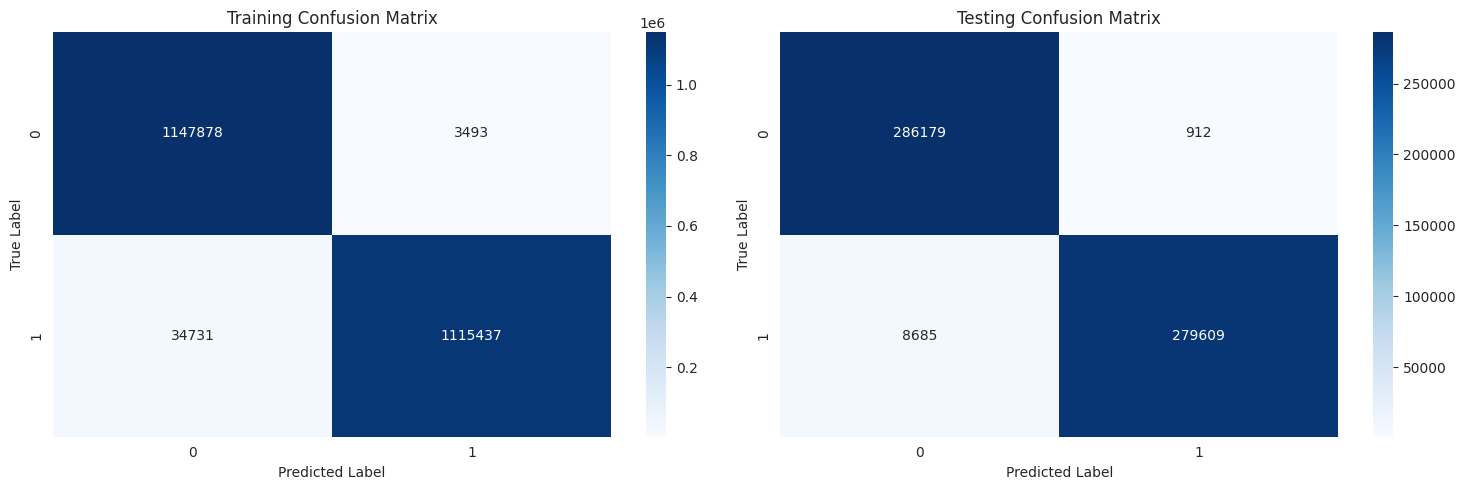

Algorithm: Random Forest
      Metric  Training  Testing
0  Precision     100.0    100.0
1     Recall     100.0    100.0
2   F1-score     100.0    100.0




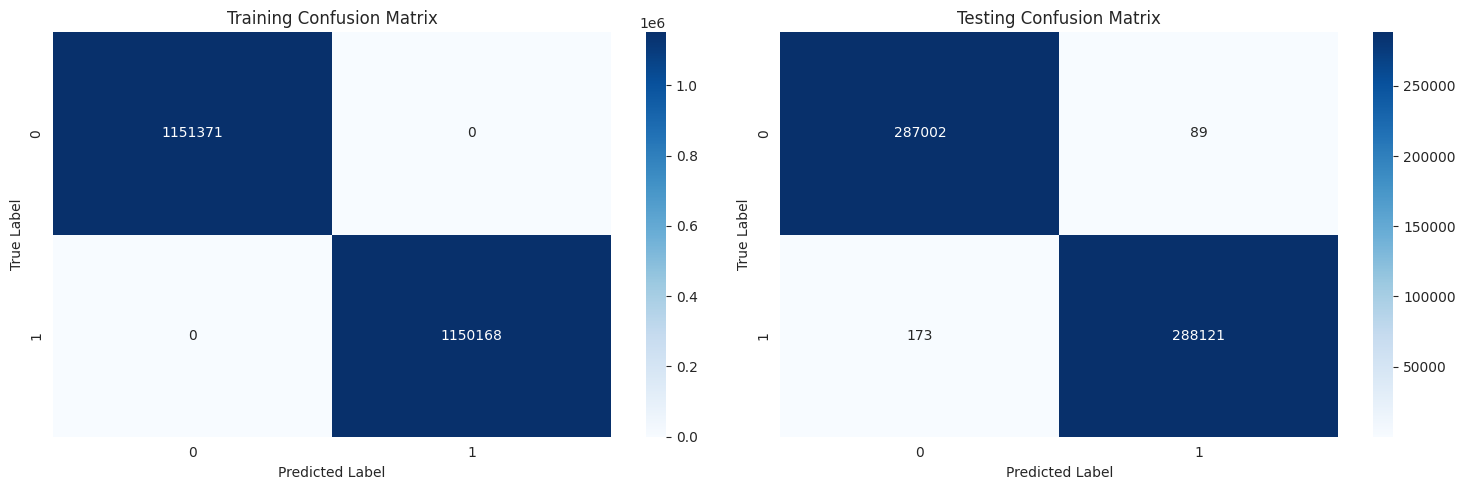

Algorithm: ExtraTreesClassifier
      Metric  Training  Testing
0  Precision     100.0    100.0
1     Recall     100.0    100.0
2   F1-score     100.0    100.0




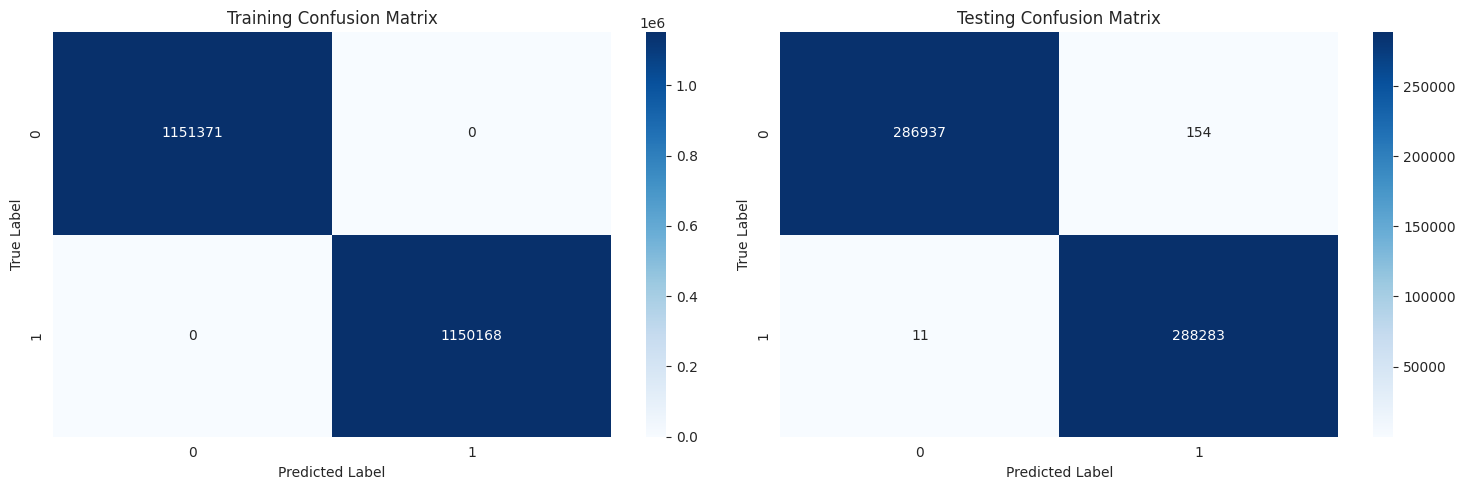

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import tensorflow as tf

# -----------------------------
# Check GPU availability
# -----------------------------
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available. Devices:")
    for device in gpu_devices:
        print(device)
else:
    print("GPU not available; using CPU.")

# -----------------------------
# Force TensorFlow operations to run on GPU
# -----------------------------
with tf.device('/GPU:0'):
    start_time = time.time()
    results = fit_classification_models(X_train_os, y_train_os)
    elapsed_time = time.time() - start_time
    print(f"\nTime taken for fit_classification_models: {elapsed_time:.2f} seconds\n")

# -----------------------------
# Plot confusion matrices and display DataFrame for each algorithm
# -----------------------------
for classifier_name, metrics in results.items():
    print(f"Algorithm: {classifier_name}")

    # Display DataFrame of performance metrics
    df = pd.DataFrame({
        'Metric': ['Precision', 'Recall', 'F1-score'],
        'Training': [
            metrics['training']['precision'],
            metrics['training']['recall'],
            metrics['training']['f1-score']
        ],
        'Testing': [
            metrics['testing']['precision'],
            metrics['testing']['recall'],
            metrics['testing']['f1-score']
        ]
    })
    print(df)
    print("\n")

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Training confusion matrix
    sns.heatmap(metrics['training']['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Training Confusion Matrix')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # Testing confusion matrix
    sns.heatmap(metrics['testing']['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('Testing Confusion Matrix')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [ ]:
# Initialize a list to store the scores
all_scores = []

# Iterate over the results
for classifier_name, metrics in results.items():
    # Append the scores to the list
    all_scores.append({
        'Algorithm': classifier_name,
        'Training Precision': metrics['training']['precision'],
        'Testing Precision': metrics['testing']['precision'],
        'Training Recall': metrics['training']['recall'],
        'Testing Recall': metrics['testing']['recall'],
        'Training F1-score': metrics['training']['f1-score'],
        'Testing F1-score': metrics['testing']['f1-score']
    })

# Create a DataFrame from the scores list
scores_df = pd.DataFrame(all_scores)

# Sort the DataFrame by the 'Testing F1-score' column in descending order
scores_sorted = scores_df.sort_values(by='Testing F1-score', ascending=False)

# Display the sorted DataFrame
scores_sorted

,Algorithm,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score
1,Random Forest,100.0,100.0,100.0,100.0,100.0,100.0
2,ExtraTreesClassifier,100.0,100.0,100.0,100.0,100.0,100.0
0,XGBoost,98.4,98.4,98.3,98.3,98.3,98.3


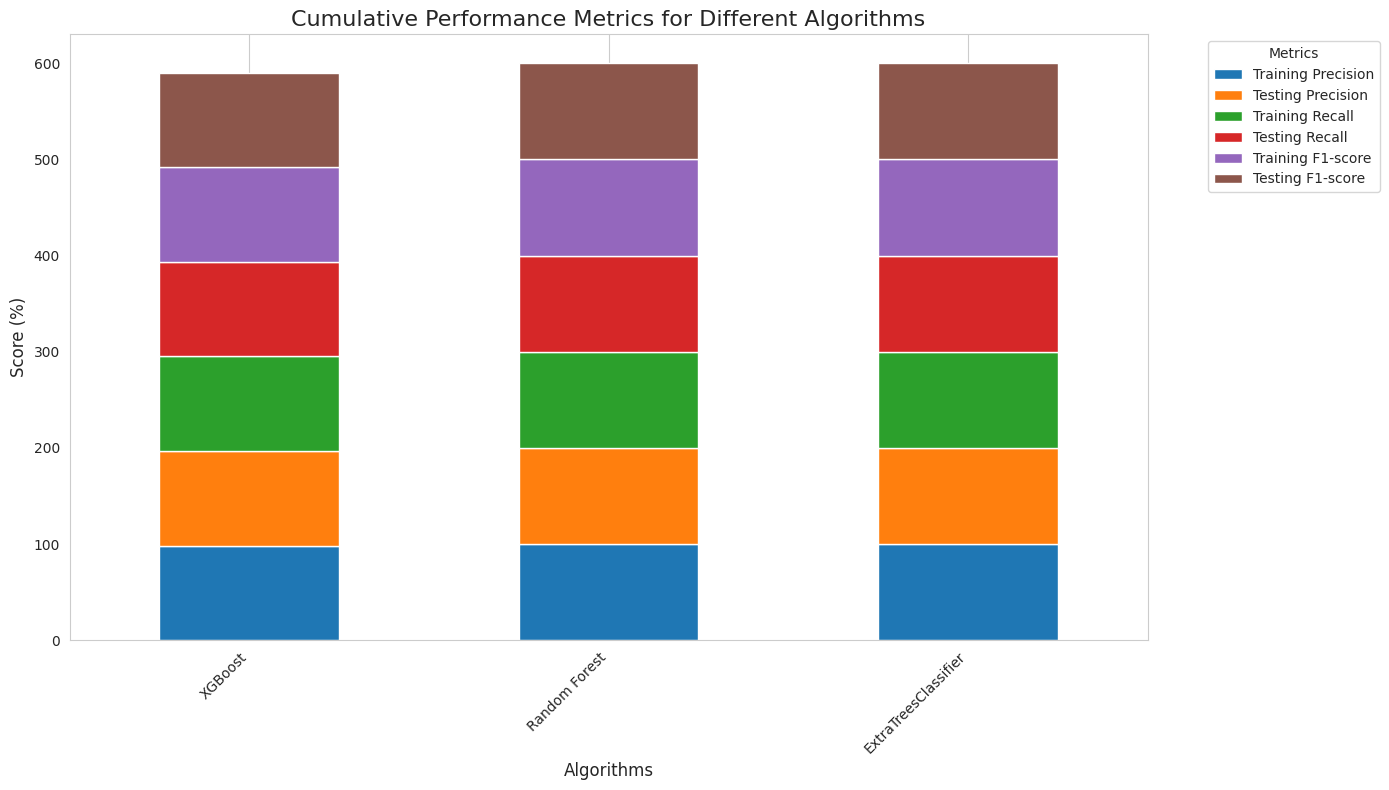

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'scores_df'
# First, ensure your DataFrame is in the correct format with a column to represent the categories for the stacked bar chart
# You have already sorted scores_df by 'Testing F1-score' in descending order.

# Create a list of metrics for the plot
metrics = ['Training Precision', 'Testing Precision', 'Training Recall', 'Testing Recall', 'Training F1-score', 'Testing F1-score']

# Set the 'Algorithm' column as the index
scores_df = scores_df.set_index('Algorithm')

# Plotting
ax = scores_df[metrics].plot(kind='bar', stacked=True, figsize=(14, 8))

# Customize the plot
plt.title('Cumulative Performance Metrics for Different Algorithms', fontsize=16)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y') # Add a horizontal grid for better readability
plt.show()

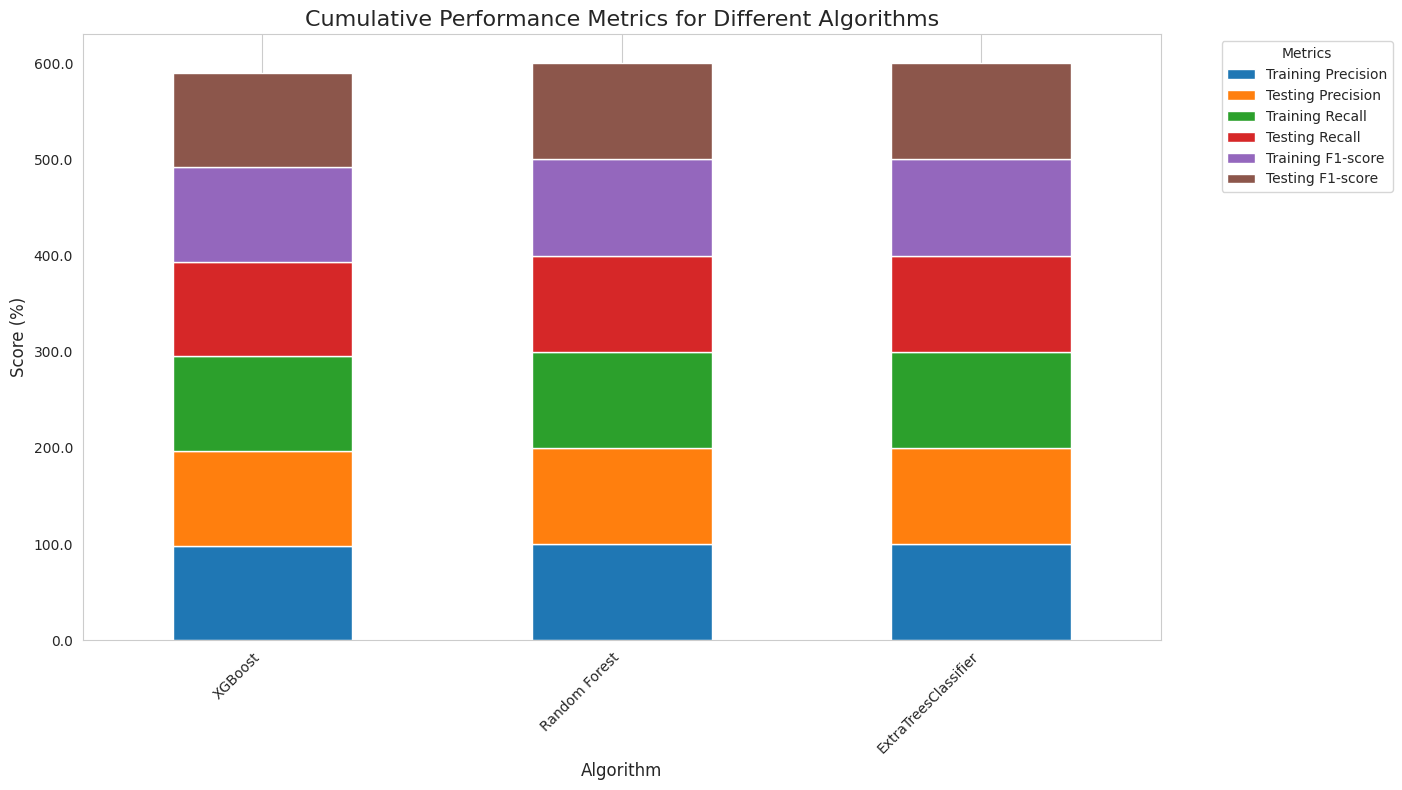

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter


# Assuming your DataFrame is named 'scores_df'
# First, ensure your DataFrame is in the correct format with a column to represent the categories for the stacked bar chart
# You have already sorted scores_df by 'Testing F1-score' in descending order.
scores_df = scores_df.reset_index()

# Create a list of metrics for the plot
metrics = ['Training Precision', 'Testing Precision', 'Training Recall', 'Testing Recall', 'Training F1-score', 'Testing F1-score']

# Set the 'Algorithm' column as the index
scores_df = scores_df.set_index('Algorithm')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
scores_df[metrics].plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
plt.title('Cumulative Performance Metrics for Different Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y') # Add a horizontal grid for better readability

# Adjust y-axis precision
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Adjust x-axis precision, set the ticks to be integers
ax.xaxis.set_ticks(np.arange(len(scores_df.index)))
ax.set_xticklabels(scores_df.index)

plt.show()